In [1]:
from libpysal import weights, examples
from libpysal.cg import voronoi_frames
import contextily as cx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas
import pandas as pd

In [2]:
bike_network = geopandas.read_file("data/bike_network.gpkg")

In [3]:
bike_network.head()

,osmid,y,x,street_count,highway,ref,geometry
0,95584835,51.083111,17.049513,4,,,POINT (17.04951 51.08311)
1,95584841,51.084699,17.064367,3,,,POINT (17.06437 51.08470)
2,95584850,51.083328,17.035057,4,,,POINT (17.03506 51.08333)
3,95584852,51.083009,17.053573,4,,,POINT (17.05357 51.08301)
4,95584855,51.083333,17.034685,4,,,POINT (17.03468 51.08333)


In [4]:
x_min = bike_network.x.min()
x_max = bike_network.x.max()
y_min = bike_network.y.min()
y_max = bike_network.y.max()
x_min, x_max, y_min, y_max

(16.8087821, 17.1747642, 51.0444469, 51.2096127)

In [5]:
x_min -= 0.04
x_max += 0.04
y_min -= 0.02 
y_max += 0.02
x_min, x_max, y_min, y_max

(16.7687821, 17.214764199999998, 51.024446899999994, 51.229612700000004)

In [7]:
G = nx.read_gpickle('data/bike_and_investmap.gpickle')
G = nx.Graph(G)
G.remove_edges_from(list(nx.selfloop_edges(G)))
bike_invest_network = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [8]:
rm_index = bike_invest_network[(bike_invest_network.x == 0.0) | \
    (bike_invest_network.x < x_min) | \
    (bike_invest_network.x > x_max) | \
    (bike_invest_network.y < y_min) | \
    (bike_invest_network.y > y_max) | \
    (bike_invest_network.index == '14472_building') | \
    (bike_invest_network.index == '15342_building') \
].index
# append(bike_invest_network.iloc[[51564,51581]]).index

In [9]:
for index in list(rm_index):
    G.remove_node(index)
bike_invest_network.drop(rm_index, inplace=True)
bike_invest_network.head()

,y,x,street_count,type,highway,ref,name
95584835,51.083111,17.049513,4.0,crossing,NaN,NaN,NaN
95584841,51.084699,17.064367,3.0,crossing,NaN,NaN,NaN
95584850,51.083328,17.035057,4.0,crossing,NaN,NaN,NaN
95584852,51.083009,17.053573,4.0,crossing,NaN,NaN,NaN
95584855,51.083333,17.034685,4.0,crossing,NaN,NaN,NaN


In [10]:
coordinates = np.column_stack((bike_invest_network.x, bike_invest_network.y))
cells, generators = voronoi_frames(coordinates, clip="convex hull")
positions = dict(zip(G.nodes, coordinates))

In [436]:
from itertools import count
node_type = set(nx.get_node_attributes(G,'type').values())
mapping = dict(zip(sorted(node_type),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['type']] for n in nodes]
node_size = list((np.array(colors) - 1) * (-14) + 1)

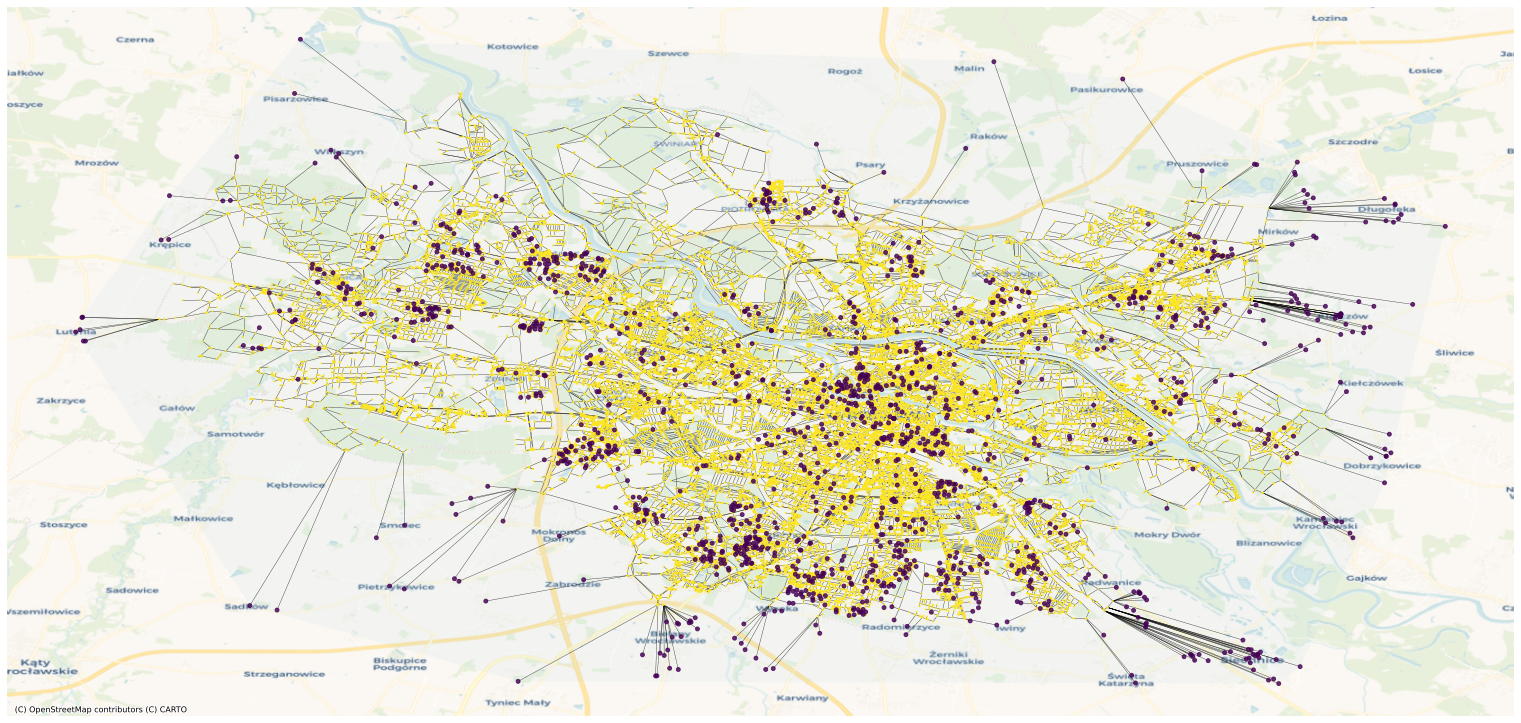

In [25]:
# Now, we can plot with a nice basemap.
ax = cells.plot(facecolor="lightblue", alpha=0.10, edgecolor="cornsilk", linewidth=0.1, figsize=(27, 18))

cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.CartoDB.Voyager)
# ax.axis("off")
nx.draw(
    G,
    positions,
    ax=ax,
    node_size=node_size,
    width=.4,
    node_color=colors,
    edge_color="k",
    alpha=0.8,
)
plt.show()

In [35]:
new_colors = ['green' if color == 1 else 'purple' for color in colors]

/home/karol/miniconda3/envs/pdp/lib/python3.10/site-packages/geopandas/plotting.py:402: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


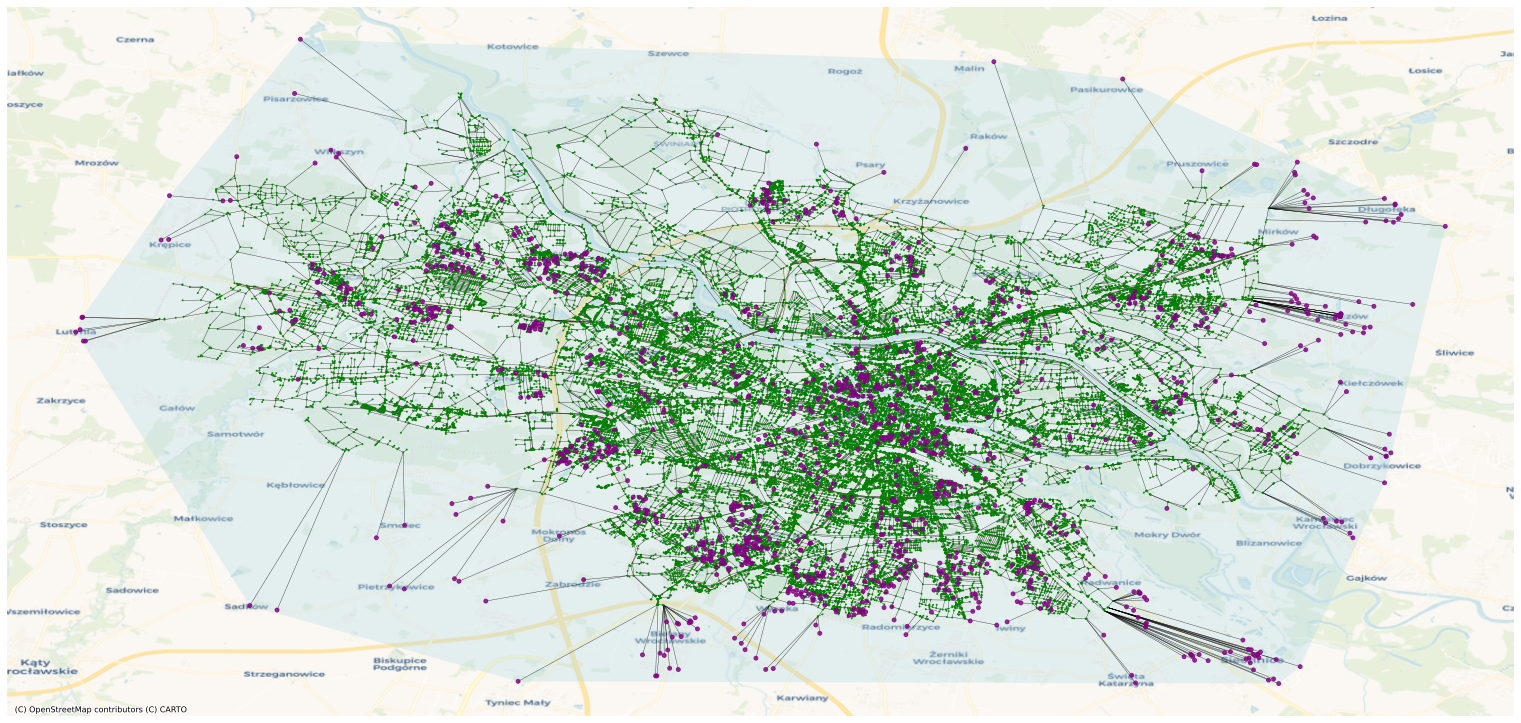

In [38]:
ax = cells.plot(facecolor="lightblue", alpha=0.30, edgecolor="cornsilk", linewidth=0.1, figsize=(27, 18))
cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.CartoDB.Voyager)
ax.axis("off")
nx.draw(
    G,
    positions,
    ax=ax,
    node_size=node_size,
    width=.4,
    node_color=new_colors,
    edge_color="k",
    alpha=0.8,
)
geopandas.GeoSeries().plot(ax=ax, color='k', alpha=0.5)
plt.show()